### Plotting Data with Pandas and Matplotlib.Pyplot

For common plot types and settings, pandas provides functions that can be
accessed directly from the dataframe. It is always possible to design
manual plots via matplotlib.pyplot, or use other libraries such as seaborn.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

a) Read the file "LaborSupply1988.csv" into a pandas dataframe.

In [3]:
df = pd.read_csv("LaborSupply1988.csv")
df.head()

,lnhr,lnwg,kids,age,disab
0,7.82,1.98,2,36,0
1,7.63,1.79,0,44,0
2,7.62,2.64,0,35,1
3,8.01,1.98,2,31,0
4,7.73,2.56,2,41,0


b) Plot a histogram of the attribute "age". What is the most frequent age?

0    39
Name: age, dtype: int64

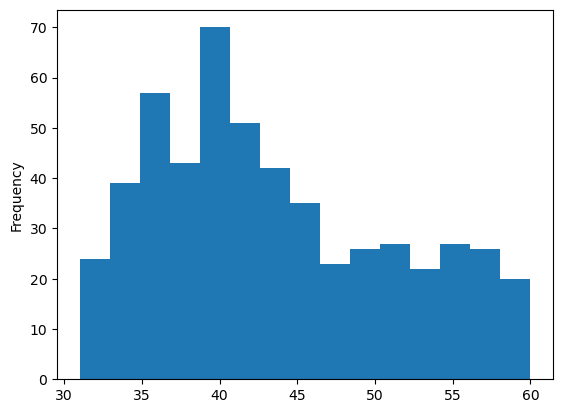

In [4]:
# Pandas dataframes have built in basic plotting functionalities
df["age"].plot.hist(bins=15)
df["age"].mode()  # the mode is the most common value in a dataset

c) Plot the average number of "kids" against "age" and interpret the resulting graph.  
Compute the correlation between "kids" and "age" to check your interpretation.

          kids       age
kids  1.000000 -0.639659
age  -0.639659  1.000000


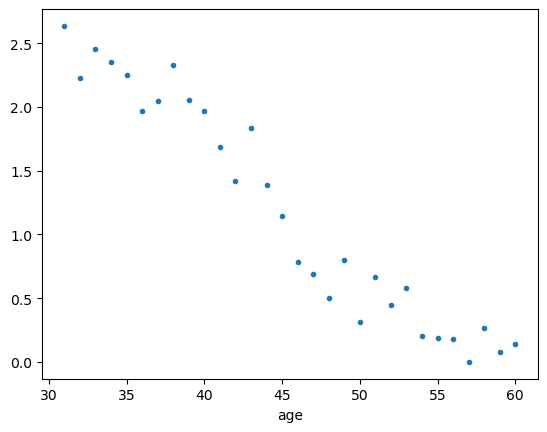

In [7]:
df.groupby("age")["kids"].mean().plot(style=".")

corr = df[["kids", "age"]].corr()
print(corr)

*The correlation between age and kids is negative, meaning the average number of kids decreases with increasing age.*

d) Plot "log of hourly wage (lnwg)" against "age".

<Axes: xlabel='age'>

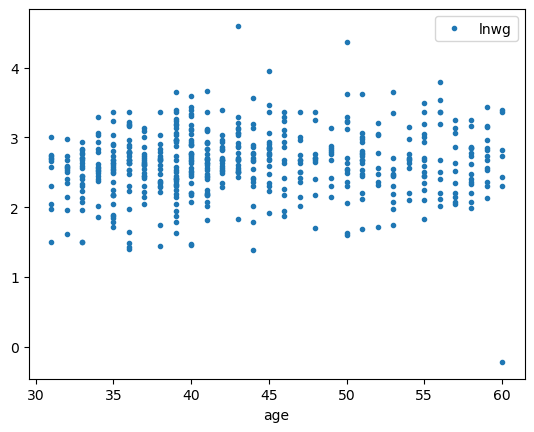

In [8]:
df.plot(x="age", y="lnwg", style=".")

e) Plot the mean of "log of hourly wages (lnwg)" against "age".  
Compute and discuss the type of correlation between "lnwg" and "age".

           age      lnwg
age   1.000000  0.094002
lnwg  0.094002  1.000000


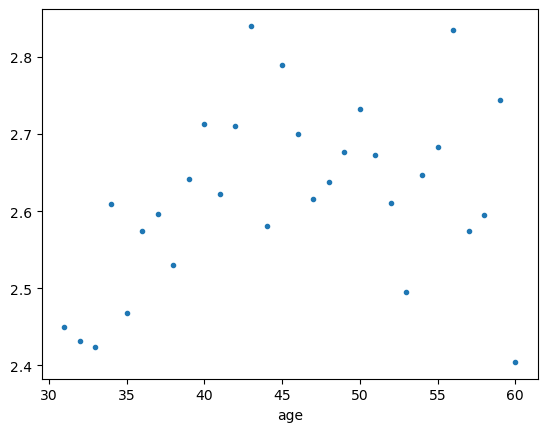

In [9]:
df.groupby("age")["lnwg"].mean().plot(x="age", y="lnwg", style=".")
corr = df[["age", "lnwg"]].corr()
print(corr)

f) Plot "lnhr" against "age" with different colors for "disab=0" and "disab=1".

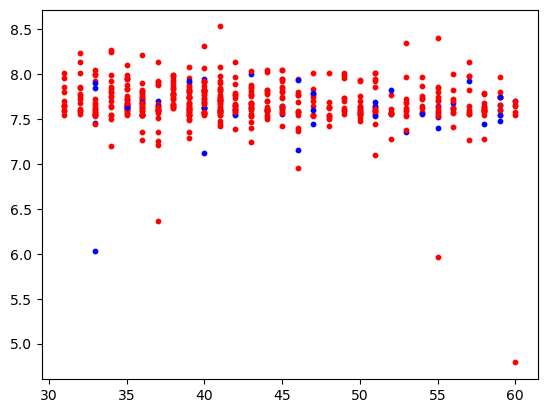

In [10]:
Xs = df["age"].values
Ys = df["lnhr"].values
filterfunction = lambda x : "red" if x == 0 else "blue"
colors = df["disab"].apply(filterfunction).values
for x, y, c in zip(Xs, Ys, colors):
    plt.scatter(x, y, s=10, color=c)
plt.show()

g) Create a boxplot of the "lnhr" (log of annual hours) against the number of kids.  
What can be observed regarding median and variance?  
Is the observation meaningful for large values of kids?

lnhr    Axes(0.125,0.11;0.775x0.77)
dtype: object

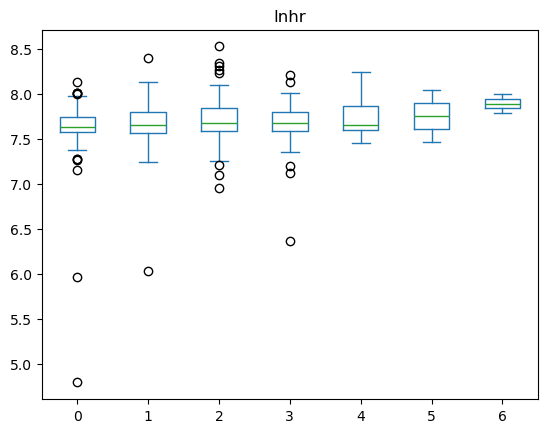

In [11]:
df.plot.box(column="lnhr", by="kids")